# SPOTIFY HIT PREDICTION - CLASSIFICATION PROJECT

# GENERAL INTRODUCTION

The Spotify Hit Predictor dataset (1960-2019) is a collection of features for tracks obtained using Spotify's Web API. Each track in the dataset is labeled either '1' or '0' ('Hit' or 'Flop') based on certain criteria defined by the author. The attributes of the dataset include information on the track, artist, URI, danceability, energy, loudness, speechiness, acousticness, instrumentalness, valence, duration in milliseconds, chorus hit, and target.

It should be noted that this dataset was created by merging two latest files together to form a more comprehensive dataset. The dataset is intended to be used for predicting whether a given track is likely to be a 'Hit' or a 'Flop'. In order to achieve this goal, we will explore and analyze the data, clean and preprocess it as necessary, and train several machine learning models using the available features. Finally, we will evaluate the models and choose the best one for predicting track success.

# SOURCES

The Dataset is orignally derived from the website Kaggle.com you can access it from here https://www.kaggle.com/datasets/theoverman/the-spotify-hit-predictor-dataset

# PROBLEM APPROACH

The type of dataset and the problem is a classic supervised binary classification. We want to build a machine learning model to predict whether a song will be a 'Hit' or a 'Flop', using data from Spotify. We start by inspecting and visualizing the dataset, then clean and transform the data before building and testing multiple models (LR, RFC, GaussianNB, KNN, LDA, SCV, CARD). We evaluate the models using metrics like accuracy, precision, recall, and AUC-ROC, then analyze their performance by Confusion Matrix and Classification Report to select the two best models, Random Forest Classifier and SVM. After that, we modify the threshold of the Random Forest Classifier model and evaluate its performance on the test set. Finally, we check the performance of the final model with 'made-up' information.

# OUTLINE

I) DATA INSPECTION:

1) IMPORT LIBRARIES AND DATASET

2) GENERAL DESCRIPTION

3) VISUALIZATION OF DATASET

II) DATA CLEANING AND TRANSFORMATION

1) DEALING WITH NULL VALUE

2) DEALING WITH OUTLIERS

3) FEATURE SCALING

III) TESTING MULTIPLE MODELS

1) SPLITTING THE DATASET

2) BUILDING AND TESTING MODEL

IV) BUILDING THE BEST MODEL FOR PREDICTION

1) ANALYSIS OF 2 MODELS: RANDOMFORESTCLASSIFIER AND SUPPORTVECTORCLASSIFIER

2) FINDING THE BEST MODEL

3) APPLY NEW PARAMETER AND TRAIN IT

4) MODIFY THE THRESHOLD

V) MAKE PREDICTION

VI) CONCLUSION


# I) DATA INSPECTION

1) IMPORT LIBRARIES USED AND THE SPOTIFY HIT DATASET

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [11]:
data = pd.read_csv('spotify_hit.csv')

In [12]:
data

track                        artist  \
0                                       Stupor                         Baths   
1                               Still Got Time  Zayn Featuring PARTYNEXTDOOR   
2                              OMG Rock n Roll                   Kevin Morby   
3                                 Swing, Swing      The All-American Rejects   
4                    Frog and Toad Are Friends                 Armand Hammer   
...                                        ...                           ...   
11771                                    Walls                         Emery   
11772  Slanias Song - Live At Metal Camp, 2008                     Eluveitie   
11773                I Love a Man In a Uniform                  Gang Of Four   
11774                        Satan's Vengeance                   Destruction   
11775               If You Ever Stop Loving Me             Montgomery Gentry   

                                        uri  danceability  energy  loudness  \
0      spotify:track:000JBwAOq5d9lNNSnovPYg         0.794   0.669    -6.248   
1      spotify:track:000xQL6tZNLJzIrtIgxqSl         0.748   0.627    -6.029   
2      spotify:track:002ZKDDKt6oObJzIQq5Mrv         0.427   0.774    -4.377   
3      spotify:track:003FTlCpBTM4eSqYSWPv4H         0.553   0.717    -5.857   
4      spotify:track:003I0c4UcwPtqOp3rW7Dv7         0.670   0.918    -6.318   
...                                     ...           ...     ...       ...   
11771  spotify:track:7zVv1G1EB8k7BbrTF6f2SQ         0.274   0.915    -5.259   
11772  spotify:track:7zwFJaXNDslo5dlBzr9eRu         0.251   0.884    -9.425   
11773  spotify:track:7zy6jG8RIUI8qNYYVuLGbY         0.772   0.435   -12.612   
11774  spotify:track:7zY8Ra36GZoYJe65W6kcwM         0.201   0.993    -3.169   
11775  spotify:track:7zywdG4ysfC5XNBzjQAo2o         0.443   0.885    -6.172   

       speechiness  acousticness  instrumentalness  liveness  valence  \
0              NaN      0.258000          0.000089     0.338    0.648   
1              NaN      0.131000          0.000000       NaN    0.524   
2              NaN      0.287000          0.678000       NaN    0.154   
3              NaN      0.000065          0.128000       NaN    0.318   
4              NaN      0.012700          0.000000     0.872    0.678   
...            ...           ...               ...       ...      ...   
11771        0.167      0.013900          0.000074     0.161    0.419   
11772          NaN      0.017000          0.000008     0.965    0.362   
11773        0.088      0.033300          0.000000     0.514    0.920   
11774          NaN      0.000061          0.328000     0.346    0.233   
11775          NaN      0.123000          0.000031       NaN    0.536   

       duration_ms  chorus_hit  target  
0           108069    34.82253       0  
1           188491    31.64719       1  
2           149120    24.18619       0  
3           233267    29.84441       1  
4           251947    42.73762       0  
...            ...         ...     ...  
11771       203707    97.39924       0  
11772       396193    30.47446       0  
11773       247293    26.47998       0  
11774       202573    26.15514       0  
11775       202760    44.88320       1  

[11776 rows x 14 columns]

2) SHAPE OF DATA AND GENERAL DESCRIPTIONS

In [13]:
data.shape

(11776, 14)

In [14]:
data_stats = data.describe().round(2)
data_stats

danceability    energy  loudness  speechiness  acousticness  \
count      11747.00  11776.00  11776.00      6170.00      11754.00   
mean           0.55      0.68     -7.59         0.09          0.22   
std            0.19      0.24      5.25         0.10          0.30   
min            0.06      0.00    -47.33         0.02          0.00   
25%            0.43      0.55     -8.43         0.04          0.01   
50%            0.57      0.73     -6.10         0.06          0.06   
75%            0.69      0.87     -4.60         0.11          0.31   
max            0.99      1.00      1.14         0.95          1.00   

       instrumentalness  liveness   valence  duration_ms  chorus_hit    target  
count          11776.00   7588.00  11776.00     11776.00    11759.00  11776.00  
mean               0.16      0.20      0.46    247984.34       40.96      0.48  
std                0.32      0.16      0.25    117000.57       19.98      0.50  
min                0.00      0.02      0.00     15920.00        0.00      0.00  
25%                0.00      0.10      0.26    199663.50       27.83      0.00  
50%                0.00      0.13      0.45    229522.50       36.24      0.00  
75%                0.07      0.26      0.66    270658.75       48.25      1.00  
max                1.00      0.98      0.98   4170227.00      262.62      1.00

In [15]:
cor_matrix = data.corr().round(1)
cor_matrix

danceability  energy  loudness  speechiness  acousticness  \
danceability               1.0     0.1       0.3          0.2          -0.2   
energy                     0.1     1.0       0.8          0.1          -0.7   
loudness                   0.3     0.8       1.0          0.1          -0.7   
speechiness                0.2     0.1       0.1          1.0          -0.1   
acousticness              -0.2    -0.7      -0.7         -0.1           1.0   
instrumentalness          -0.3    -0.3      -0.5         -0.1           0.3   
liveness                  -0.1     0.2       0.1          0.1          -0.1   
valence                    0.5     0.3       0.3          0.1          -0.2   
duration_ms               -0.1    -0.1      -0.1         -0.0           0.1   
chorus_hit                -0.1    -0.0      -0.1         -0.0           0.0   
target                     0.4     0.1       0.3          0.1          -0.2   

                  instrumentalness  liveness  valence  duration_ms  \
danceability                  -0.3      -0.1      0.5         -0.1   
energy                        -0.3       0.2      0.3         -0.1   
loudness                      -0.5       0.1      0.3         -0.1   
speechiness                   -0.1       0.1      0.1         -0.0   
acousticness                   0.3      -0.1     -0.2          0.1   
instrumentalness               1.0      -0.0     -0.3          0.2   
liveness                      -0.0       1.0     -0.0          0.0   
valence                       -0.3      -0.0      1.0         -0.2   
duration_ms                    0.2       0.0     -0.2          1.0   
chorus_hit                     0.1       0.0     -0.1          0.1   
target                        -0.5      -0.1      0.2         -0.1   

                  chorus_hit  target  
danceability            -0.1     0.4  
energy                  -0.0     0.1  
loudness                -0.1     0.3  
speechiness             -0.0     0.1  
acousticness             0.0    -0.2  
instrumentalness         0.1    -0.5  
liveness                 0.0    -0.1  
valence                 -0.1     0.2  
duration_ms              0.1    -0.1  
chorus_hit               1.0    -0.1  
target                  -0.1     1.0

<AxesSubplot:>

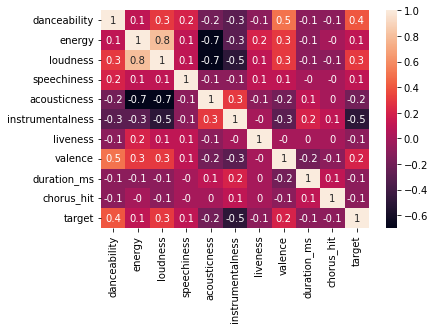

In [16]:
import seaborn as sns
sns.heatmap(cor_matrix, annot = True)

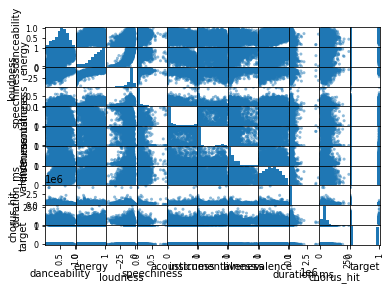

In [17]:
from pandas.plotting import scatter_matrix
scatter_matrix(data)
plt.show()

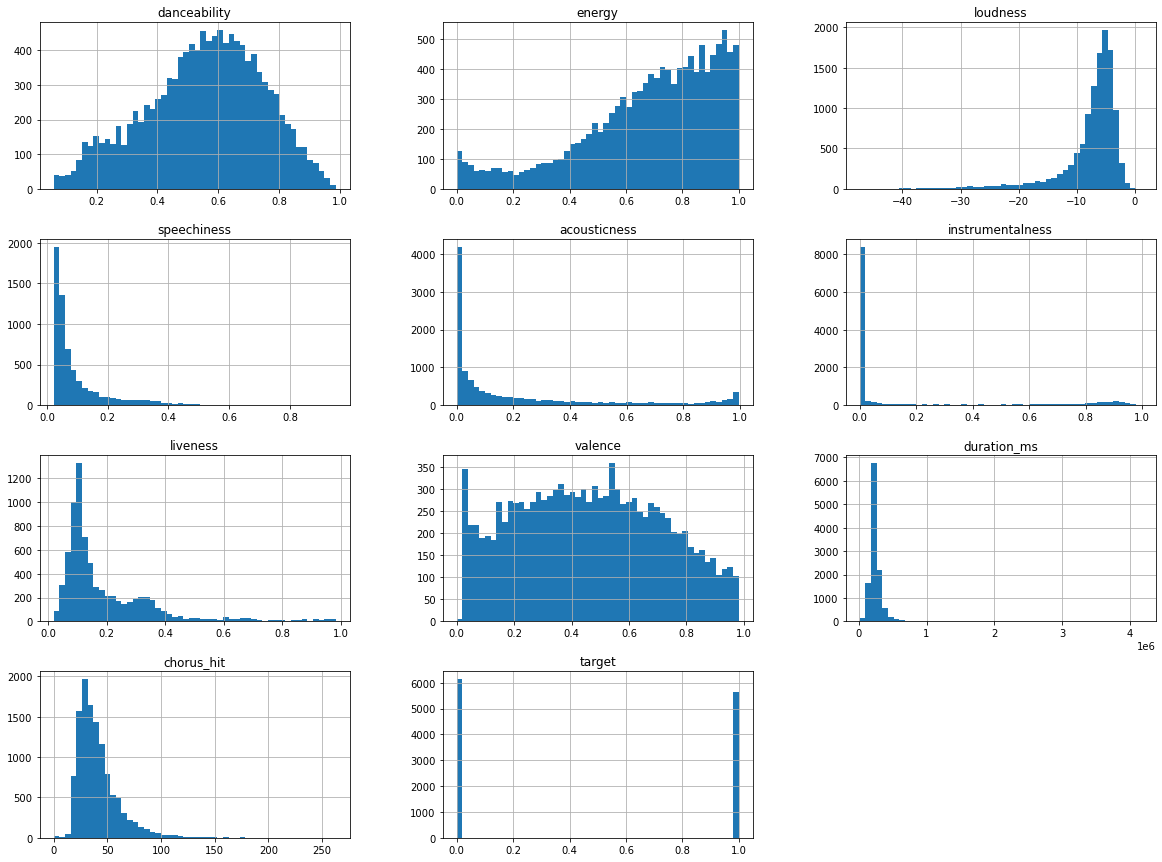

In [18]:
import matplotlib.pyplot as plt
data.hist(bins=50,figsize = (20,15))
plt.show()

# II) DATA CLEANING AND TRANSFORMATION

---



1) DEALING WITH NULL VALUE

In [19]:
data.isnull().sum()

track                  0
artist                 0
uri                    0
danceability          29
energy                 0
loudness               0
speechiness         5606
acousticness          22
instrumentalness       0
liveness            4188
valence                0
duration_ms            0
chorus_hit            17
target                 0
dtype: int64

In [20]:
spotify = data.drop(['speechiness','liveness'],axis = 1)
spotify

track                        artist  \
0                                       Stupor                         Baths   
1                               Still Got Time  Zayn Featuring PARTYNEXTDOOR   
2                              OMG Rock n Roll                   Kevin Morby   
3                                 Swing, Swing      The All-American Rejects   
4                    Frog and Toad Are Friends                 Armand Hammer   
...                                        ...                           ...   
11771                                    Walls                         Emery   
11772  Slanias Song - Live At Metal Camp, 2008                     Eluveitie   
11773                I Love a Man In a Uniform                  Gang Of Four   
11774                        Satan's Vengeance                   Destruction   
11775               If You Ever Stop Loving Me             Montgomery Gentry   

                                        uri  danceability  energy  loudness  \
0      spotify:track:000JBwAOq5d9lNNSnovPYg         0.794   0.669    -6.248   
1      spotify:track:000xQL6tZNLJzIrtIgxqSl         0.748   0.627    -6.029   
2      spotify:track:002ZKDDKt6oObJzIQq5Mrv         0.427   0.774    -4.377   
3      spotify:track:003FTlCpBTM4eSqYSWPv4H         0.553   0.717    -5.857   
4      spotify:track:003I0c4UcwPtqOp3rW7Dv7         0.670   0.918    -6.318   
...                                     ...           ...     ...       ...   
11771  spotify:track:7zVv1G1EB8k7BbrTF6f2SQ         0.274   0.915    -5.259   
11772  spotify:track:7zwFJaXNDslo5dlBzr9eRu         0.251   0.884    -9.425   
11773  spotify:track:7zy6jG8RIUI8qNYYVuLGbY         0.772   0.435   -12.612   
11774  spotify:track:7zY8Ra36GZoYJe65W6kcwM         0.201   0.993    -3.169   
11775  spotify:track:7zywdG4ysfC5XNBzjQAo2o         0.443   0.885    -6.172   

       acousticness  instrumentalness  valence  duration_ms  chorus_hit  \
0          0.258000          0.000089    0.648       108069    34.82253   
1          0.131000          0.000000    0.524       188491    31.64719   
2          0.287000          0.678000    0.154       149120    24.18619   
3          0.000065          0.128000    0.318       233267    29.84441   
4          0.012700          0.000000    0.678       251947    42.73762   
...             ...               ...      ...          ...         ...   
11771      0.013900          0.000074    0.419       203707    97.39924   
11772      0.017000          0.000008    0.362       396193    30.47446   
11773      0.033300          0.000000    0.920       247293    26.47998   
11774      0.000061          0.328000    0.233       202573    26.15514   
11775      0.123000          0.000031    0.536       202760    44.88320   

       target  
0           0  
1           1  
2           0  
3           1  
4           0  
...       ...  
11771       0  
11772       0  
11773       0  
11774       0  
11775       1  

[11776 rows x 12 columns]

In [21]:
for i in ['danceability','acousticness','chorus_hit']:
    median = spotify[i].median()
    spotify[i]=spotify[i].replace(to_replace=np.nan,value=median)

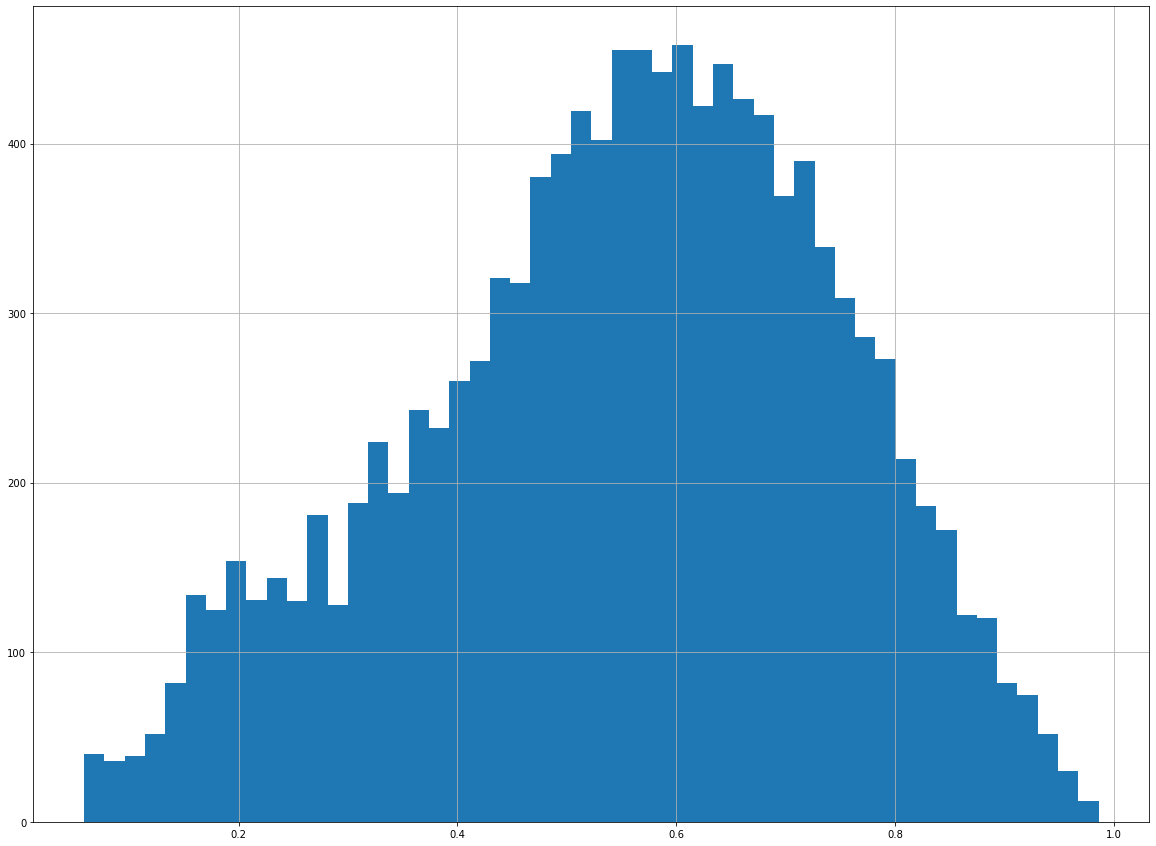

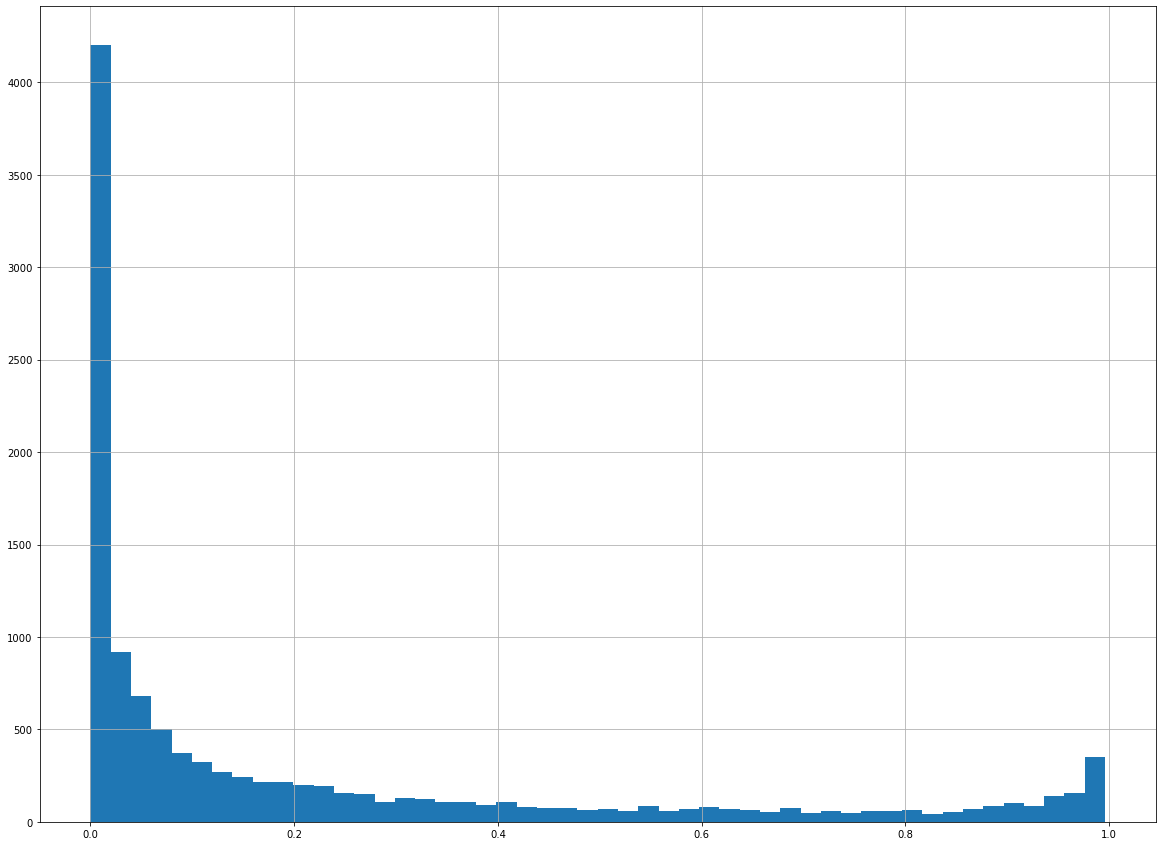

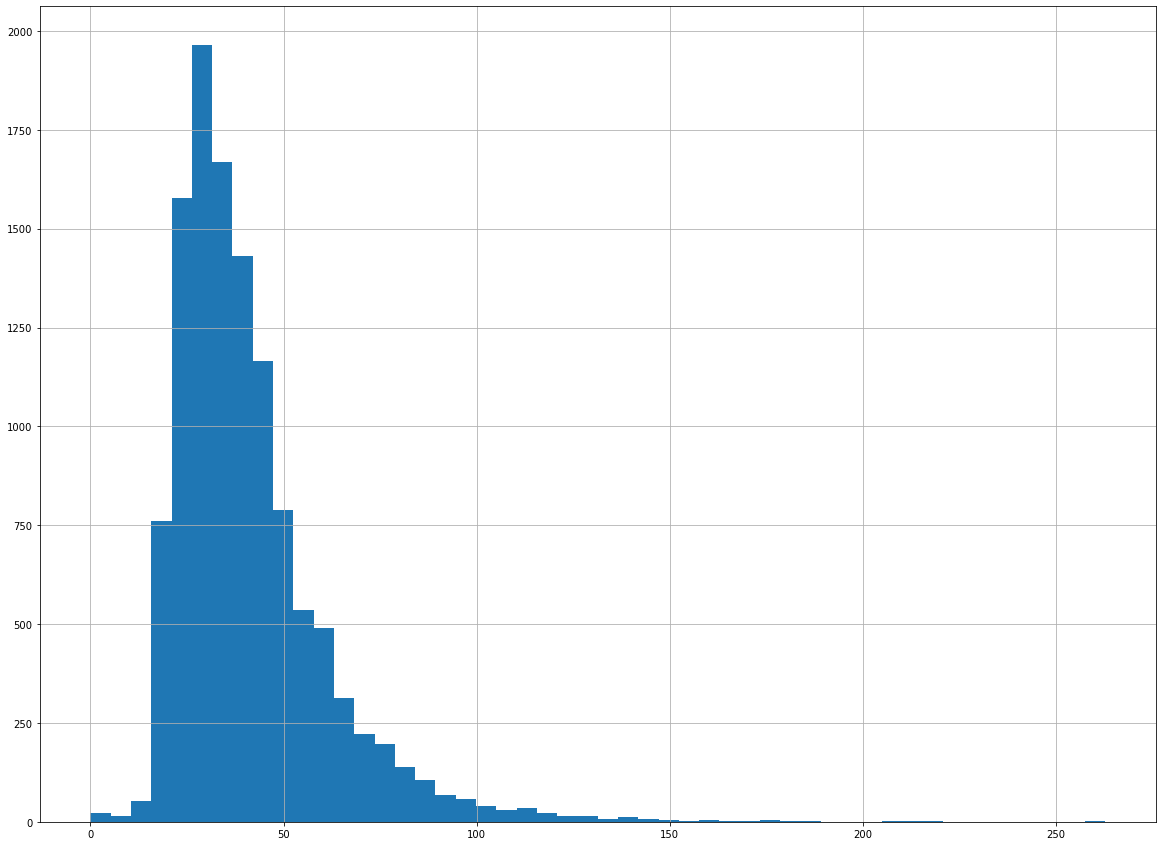

In [22]:
for i in ['danceability','acousticness','chorus_hit']:
    spotify[i].hist(bins=50,figsize = (20,15))
    plt.show()

In [23]:
spotify.isnull().any()

track               False
artist              False
uri                 False
danceability        False
energy              False
loudness            False
acousticness        False
instrumentalness    False
valence             False
duration_ms         False
chorus_hit          False
target              False
dtype: bool

In [24]:
team3=spotify.drop(['track','artist','uri'],axis=1)

In [25]:
team3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11776 entries, 0 to 11775
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      11776 non-null  float64
 1   energy            11776 non-null  float64
 2   loudness          11776 non-null  float64
 3   acousticness      11776 non-null  float64
 4   instrumentalness  11776 non-null  float64
 5   valence           11776 non-null  float64
 6   duration_ms       11776 non-null  int64  
 7   chorus_hit        11776 non-null  float64
 8   target            11776 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 828.1 KB


2) DEALING WITH OUTLIERS

To avoid negative impacts on our classification model, we're removing extreme outliers from our dataset. We calculate the Z-score for each value in each column, take the absolute value, and use a threshold of 3 standard deviations from the mean. We then remove any rows that contain extreme outliers.

In [26]:
from scipy import stats
team3 = team3[(np.abs(stats.zscore(team3))<3).all(axis=1)]

In [27]:
team3

danceability  energy  loudness  acousticness  instrumentalness  \
0             0.794   0.669    -6.248      0.258000          0.000089   
1             0.748   0.627    -6.029      0.131000          0.000000   
2             0.427   0.774    -4.377      0.287000          0.678000   
3             0.553   0.717    -5.857      0.000065          0.128000   
4             0.670   0.918    -6.318      0.012700          0.000000   
...             ...     ...       ...           ...               ...   
11771         0.274   0.915    -5.259      0.013900          0.000074   
11772         0.251   0.884    -9.425      0.017000          0.000008   
11773         0.772   0.435   -12.612      0.033300          0.000000   
11774         0.201   0.993    -3.169      0.000061          0.328000   
11775         0.443   0.885    -6.172      0.123000          0.000031   

       valence  duration_ms  chorus_hit  target  
0        0.648       108069    34.82253       0  
1        0.524       188491    31.64719       1  
2        0.154       149120    24.18619       0  
3        0.318       233267    29.84441       1  
4        0.678       251947    42.73762       0  
...        ...          ...         ...     ...  
11771    0.419       203707    97.39924       0  
11772    0.362       396193    30.47446       0  
11773    0.920       247293    26.47998       0  
11774    0.233       202573    26.15514       0  
11775    0.536       202760    44.88320       1  

[11139 rows x 9 columns]

In [28]:
index=pd.Index([i for i in range(11139)])
team3.index=index

In [29]:
team3

danceability  energy  loudness  acousticness  instrumentalness  \
0             0.794   0.669    -6.248      0.258000          0.000089   
1             0.748   0.627    -6.029      0.131000          0.000000   
2             0.427   0.774    -4.377      0.287000          0.678000   
3             0.553   0.717    -5.857      0.000065          0.128000   
4             0.670   0.918    -6.318      0.012700          0.000000   
...             ...     ...       ...           ...               ...   
11134         0.274   0.915    -5.259      0.013900          0.000074   
11135         0.251   0.884    -9.425      0.017000          0.000008   
11136         0.772   0.435   -12.612      0.033300          0.000000   
11137         0.201   0.993    -3.169      0.000061          0.328000   
11138         0.443   0.885    -6.172      0.123000          0.000031   

       valence  duration_ms  chorus_hit  target  
0        0.648       108069    34.82253       0  
1        0.524       188491    31.64719       1  
2        0.154       149120    24.18619       0  
3        0.318       233267    29.84441       1  
4        0.678       251947    42.73762       0  
...        ...          ...         ...     ...  
11134    0.419       203707    97.39924       0  
11135    0.362       396193    30.47446       0  
11136    0.920       247293    26.47998       0  
11137    0.233       202573    26.15514       0  
11138    0.536       202760    44.88320       1  

[11139 rows x 9 columns]

After removing extreme outliers from our dataset, we're left with 11139 attribute vectors. We removed 437 datapoints (3.7% reduction) that didn't meet our standards and were classified as extreme outliers.

To avoid any issues with indexing, we reset the index of our new dataset.

In [30]:
team3_stats=team3.describe().round(2)
team3_stats

danceability    energy  loudness  acousticness  instrumentalness  \
count      11139.00  11139.00  11139.00      11139.00          11139.00   
mean           0.56      0.70     -6.93          0.19              0.14   
std            0.18      0.22      3.71          0.27              0.30   
min            0.06      0.00    -23.24          0.00              0.00   
25%            0.44      0.57     -8.10          0.01              0.00   
50%            0.58      0.74     -5.97          0.06              0.00   
75%            0.70      0.88     -4.55          0.27              0.03   
max            0.99      1.00      1.14          1.00              1.00   

        valence  duration_ms  chorus_hit   target  
count  11139.00     11139.00    11139.00  11139.0  
mean       0.47    240113.40       39.38      0.5  
std        0.25     71962.44       16.27      0.5  
min        0.00     15920.00        0.00      0.0  
25%        0.28    199973.00       27.65      0.0  
50%        0.47    228907.00       35.82      1.0  
75%        0.67    267618.00       47.29      1.0  
max        0.98    598493.00      100.67      1.0

3) FEATURE SCALING

Since the attributes don't have the same range, 

In [31]:
from sklearn.preprocessing import StandardScaler as Scaler
scaler = Scaler()
scaler.fit(team3.iloc[:,:8])

StandardScaler()

In [32]:
team3_scaled = scaler.transform(team3.iloc[:,:8])
team3_scaled

array([[ 1.24519446, -0.14320643,  0.18283845, ...,  0.70712213,
        -1.83498967, -0.28026596],
       [ 0.99643198, -0.33555393,  0.24192697, ...,  0.20389587,
        -0.71738421, -0.47540169],
       [-0.73949752,  0.33766232,  0.68765413, ..., -1.29766636,
        -1.26451366, -0.93390618],
       ...,
       [ 1.1262211 , -1.21485677, -1.53423639, ...,  1.81097328,
         0.09977324, -0.79294478],
       [-1.96167842,  1.34061713,  1.01358537, ..., -0.97706254,
        -0.52168999, -0.81290733],
       [-0.65297144,  0.84600928,  0.20334405, ...,  0.25259518,
        -0.5190913 ,  0.33799733]])

In [33]:
team3_scaled_df = pd.DataFrame(team3_scaled)

In [34]:
team3_scaled_df['target']=team3['target']
team3_scaled_df.columns = team3.columns
team3_scaled_df

danceability    energy  loudness  acousticness  instrumentalness  \
0          1.245194 -0.143206  0.182838      0.230390         -0.486852   
1          0.996432 -0.335554  0.241927     -0.232382         -0.487154   
2         -0.739498  0.337662  0.687654      0.336062          1.801526   
3         -0.058105  0.076619  0.288334     -0.709493         -0.055073   
4          0.574617  0.997139  0.163952     -0.663452         -0.487154   
...             ...       ...       ...           ...               ...   
11134     -1.566903  0.983400  0.449681     -0.659079         -0.486905   
11135     -1.691284  0.841430 -0.674350     -0.647783         -0.487125   
11136      1.126221 -1.214857 -1.534236     -0.588388         -0.487154   
11137     -1.961678  1.340617  1.013585     -0.709508          0.620054   
11138     -0.652971  0.846009  0.203344     -0.261533         -0.487050   

        valence  duration_ms  chorus_hit  target  
0      0.707122    -1.834990   -0.280266       0  
1      0.203896    -0.717384   -0.475402       1  
2     -1.297666    -1.264514   -0.933906       0  
3     -0.632109    -0.095143   -0.586189       1  
4      0.828870     0.164449    0.206144       0  
...         ...          ...         ...     ...  
11134 -0.222223    -0.505931    3.565291       0  
11135 -0.453545     2.169001   -0.547470       0  
11136  1.810973     0.099773   -0.792945       0  
11137 -0.977063    -0.521690   -0.812907       0  
11138  0.252595    -0.519091    0.337997       1  

[11139 rows x 9 columns]

In [35]:
team3_scaled_df.target.isnull().any()

False

# III) TESTING MULTIPLE MODELS

1) SPLITING THE DATASET INTO TRAIN AND TEST SET

In this case, we want to split the it into to train and test set with ratio 0.75 : 0.25, respectively

In [36]:
X_train,X_test,Y_train,Y_test = sklearn.model_selection.train_test_split(team3_scaled,team3.target,test_size=0.25,random_state=5)

2) BUILDING AND TESTING MODELS

Right now, we didnot know which model is the best for our classification, we train and test each of them

To avoid overfitting, we split the dataset into many different folds for training and testing

In [37]:
#Import all the learning algorithms we want to test
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [38]:
#Import some utilities of sklearn to compare algorithms
from sklearn import model_selection
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score # metric, confusion_matrix reporting, accuracy calculating

In [39]:
# Prepare the configuration to run the test
results = []
names = []
seed = 7

In [40]:
# Prepare an array with all the algorithms
models = []
models.append(('LR',LogisticRegression(solver = 'liblinear',multi_class='ovr')))
models.append(('CARD',DecisionTreeClassifier()))
models.append(('RFC',RandomForestClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))


In [41]:
#Evaluate each model in turn
for name, model in models:
    kfold = model_selection.KFold(n_splits=10,random_state=seed,shuffle = True)
    cv_results = model_selection.cross_val_score(model,X_train,Y_train,cv=kfold,scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg="%s:%f(%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

LR:0.799497(0.006667)
CARD:0.760354(0.010917)
RFC:0.835049(0.010639)
KNN:0.798897(0.012545)
LDA:0.792795(0.014794)
NB:0.747907(0.011062)
SVM:0.825236(0.007416)


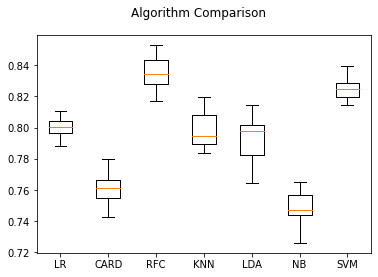

In [42]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

It looks like that using this comparison method, the most two performant algorithms are Random Forest Classifier and Support Vector Machine,those mean accuracy of 2 models are respectively 83.32% and 82.52%.

ROC CURVE FOR COMPARISON

In [43]:
#Define x and y axis
x = team3_scaled_df.drop(axis = 1,columns = 'target')
y_true = np.array(team3['target'])

In [44]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression

#Logistic Regression
lr = LogisticRegression()
lr.fit(x,y_true)
y_score_lr = cross_val_predict(lr,x,y_true,method = 'decision_function',cv=10)
fpr,tpr,threshold=roc_curve(y_true,y_score_lr)
from sklearn.model_selection import cross_val_score




In [47]:
#Decision Tree Classifier
card = DecisionTreeClassifier()
card.fit(x,y_true)
y_score_card = cross_val_predict(card,x,y_true,method = 'predict_proba',cv=10)
fpr_card,tpr_card,threshold_card=roc_curve(y_true,y_score_card[:,1])

In [48]:
#Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(x,y_true)
y_score_rfc = cross_val_predict(rfc,x,y_true,method = 'predict_proba',cv=10)
fpr_rfc,tpr_rfc,threshold_rfc=roc_curve(y_true,y_score_rfc[:,1])

In [49]:
# Support Vector Classifier
svc = SVC(probability = True)
svc.fit(x,y_true)
svc_results = cross_val_score(svc,x,y_true,scoring='accuracy')
y_score_svc = cross_val_predict(svc,x,y_true,method='predict_proba',cv=10)
fpr_svc, tpr_svc, threshold_svc = roc_curve(y_true,y_score_svc[:,1])

In [50]:
#GaussianNB
gnbc = GaussianNB()
gnbc.fit(x,y_true)
gnbc_results = cross_val_score(gnbc,x,y_true,scoring = 'accuracy')
y_score_gnb = cross_val_predict(gnbc,x,y_true,method = 'predict_proba',cv=10)
fpr_gnb,tpr_gnb,threshold_gnb = roc_curve(y_true,y_score_gnb[:,1])

In [51]:
#KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(x,y_true)
knc_results = cross_val_score(knc,x,y_true,scoring='accuracy')
y_score_knn = cross_val_predict(knc,x,y_true,method='predict_proba',cv=10)
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_true,y_score_knn[:,1])

In [52]:
# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(x,y_true)
lda_results = cross_val_score(lda,x,y_true,scoring='accuracy')
y_score_lda = cross_val_predict(lda,x,y_true,method='predict_proba',cv=10)
fpr_lda, tpr_lda, threshold_lda = roc_curve(y_true,y_score_lda[:,1])


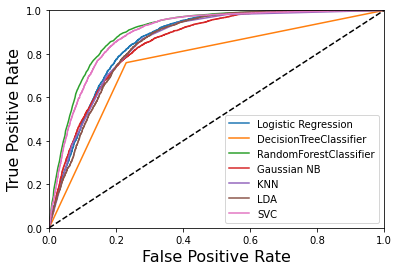

<Figure size 720x432 with 0 Axes>

In [53]:
# ROC Curve for the models above
plt.plot(fpr,tpr,label='Logistic Regression')
plt.plot(fpr_card,tpr_card,label='DecisionTreeClassifier')
plt.plot(fpr_rfc,tpr_rfc,label='RandomForestClassifier')
plt.plot(fpr_gnb, tpr_gnb,label='Gaussian NB')
plt.plot(fpr_knn, tpr_knn,label='KNN')
plt.plot(fpr_lda, tpr_lda,label='LDA')
plt.plot(fpr_svc, tpr_svc,label='SVC')
plt.legend()
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.figure(figsize=(10, 6))
plt.show()

In [54]:
from sklearn.metrics import roc_auc_score
print ('AUC of Logistic Regression:',roc_auc_score(y_true,y_score_lr))
print ('AUC of RandomForestClassifier:',roc_auc_score(y_true,y_score_rfc[:,1]))
print ('AUC of GaussianNB:',roc_auc_score(y_true,y_score_gnb[:,1]))
print ('AUC of KNeighborsClassifier:',roc_auc_score(y_true,y_score_knn[:,1]))
print ('AUC of Linear Discriminant Analysis:',roc_auc_score(y_true,y_score_lda[:,1]))
print ('AUC of Support Vector Machine:',roc_auc_score(y_true,y_score_svc[:,1]))

AUC of Logistic Regression: 0.8630316945429317
AUC of RandomForestClassifier: 0.9042491558459561
AUC of GaussianNB: 0.8516875021357726
AUC of KNeighborsClassifier: 0.8542832314932485
AUC of Linear Discriminant Analysis: 0.8542828929934408
AUC of Support Vector Machine: 0.8944631747671282


It looks like that using this comparison method, the most two performant algorithm are Random Forest Classifier and Support Vector Machine, those 2 models have 90.42% and 89.44% efficiency respectively.

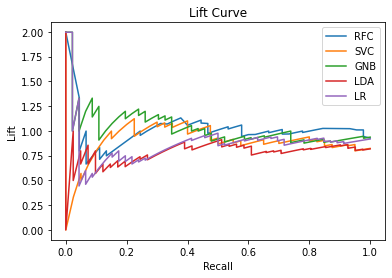

In [55]:
from sklearn.metrics import precision_recall_curve
y_score_set = [np.random.choice(y_score_rfc[:,1],100), np.random.choice(y_score_svc[:,1],100), np.random.choice(y_score_gnb[:,1],100), np.random.choice(y_score_lda[:,1],100)]
model_set = ['RFC','SVC','GNB','LDA']
for y_score, model in zip(y_score_set, model_set):
    precision, recall, thresholds = precision_recall_curve(np.random.choice(y_true,100), y_score)
    p = sum(y_true) / len(y_true)
    lift = precision / p
    plt.plot(recall, lift, label=model)
    plt.legend()
precision, recall, thresholds = precision_recall_curve(np.random.choice(y_true,100), np.random.choice(y_score_lr,100))
p = sum(y_true) / len(y_true)
lift = precision / p
plt.plot(recall, lift, label='LR')
plt.xlabel('Recall')
plt.ylabel('Lift')
plt.title('Lift Curve')
plt.legend()
plt.show()


# IV) BUIDING THE BEST MODEL FOR PREDICTION

##### 1) ANALYSIS OF 2 MODELS: RANDOM FOREST AND SUPPORT VECTOR CLASSIFIER

The following confusion matrices and classification reports will give you a brief overview of the 2 most effective models

### CONFUSION MATRIX

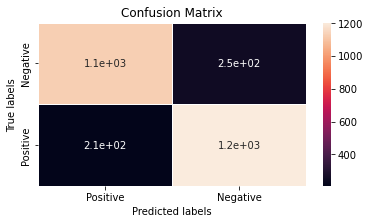

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#RandomForestClassifier
rfc.fit(X_train,Y_train)
predictions1=rfc.predict(X_test)
cm1=confusion_matrix(Y_test,predictions1)
fig, ax= plt.subplots(figsize=(6,3))
sns.heatmap(cm1, annot=True, ax = ax,linewidths=.5); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Negative', 'Positive']);

In [60]:
tn, fp, fn, tp = confusion_matrix(Y_test,predictions1).ravel()
print('True Positive:', tp,';',
      'False Positive:', fp,';',
      'True Negative:', tn,';',
      'False Negative', fn)

True Positive: 1203 ; False Positive: 247 ; True Negative: 1127 ; False Negative 208


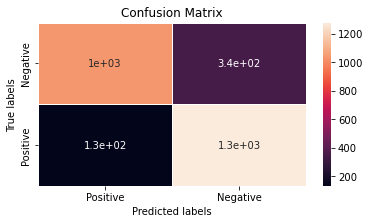

In [61]:
#SVC
svc = SVC()
svc.fit(X_train,Y_train)
predictions2=svc.predict(X_test)
cm2=confusion_matrix(Y_test,predictions2)
fig, ax= plt.subplots(figsize=(6,3))
sns.heatmap(cm2, annot=True, ax = ax,linewidths=.5); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Negative', 'Positive']);

In [62]:
tn, fp, fn, tp = confusion_matrix(Y_test,predictions2).ravel()
print('True Positive:', tp,';',
      'False Positive:', fp,';',
      'True Negative:', tn,';',
      'False Negative', fn)

True Positive: 1279 ; False Positive: 340 ; True Negative: 1034 ; False Negative 132


### CLASSIFICATION REPORT 

In [63]:
from sklearn.metrics import confusion_matrix
#Random Forest
print(classification_report(Y_test,predictions1))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1374
           1       0.83      0.85      0.84      1411

    accuracy                           0.84      2785
   macro avg       0.84      0.84      0.84      2785
weighted avg       0.84      0.84      0.84      2785



In [64]:
#Support Vector Classifier
print(classification_report(Y_test,predictions2))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1374
           1       0.79      0.91      0.84      1411

    accuracy                           0.83      2785
   macro avg       0.84      0.83      0.83      2785
weighted avg       0.84      0.83      0.83      2785



##### 2) USE GRIDSEARCH TO FIND THE BEST PARAMETERS

In [65]:
#Model1: Random Forest Classifier
from sklearn.model_selection import GridSearchCV
param_grid1 = {'n_estimators':[50,100],
               'max_depth':[None,5],
              'min_samples_split': [2,5],
              'min_samples_leaf':[1,2]}

grid_search1 = GridSearchCV(
    rfc, param_grid1, cv=5, scoring='accuracy')
grid_search1.fit(X_train, Y_train)
print("Best hyperparameters:", grid_search1.best_params_)
print("The best score for this model is",grid_search1.best_score_)
best_rfc = grid_search1.best_estimator_
test_accuracy = best_rfc.score(X_test, Y_test)
print("Test accuracy:", test_accuracy)

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
The best score for this model is 0.8369642044456868
Test accuracy: 0.8344703770197487


In [66]:
#Model2: Support Vector Classifier
param_grid2 = {
    'kernel':['linear'],
    'C':[0.1,1],
    'gamma':[0.1,1]
}
model_svm= SVC()
grid_search2 = GridSearchCV(
    model_svm, param_grid2, cv=5,n_jobs=-1)
grid_search2.fit(X_train, Y_train)
print("Best hyperparameters:", grid_search2.best_params_)
print("The best score for this model is",grid_search2.best_score_)
best_svm = grid_search2.best_estimator_
test_accuracy = best_svm.score(X_test, Y_test)
print("Test accuracy:", test_accuracy)

Best hyperparameters: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
The best score for this model is 0.7971040325094874
Test accuracy: 0.7992818671454219


As in 2 good models, RandomForestClassifer perform better in both best_score and test_accuracy. Particularly, during training, the Random Forest Classifier achieved a higher cross-validation score of 0.837, compared to 0.797 for the SVM. In addition, when evaluated on an independent test set, the Random Forest Classifier also performed better, achieving a test accuracy of 0.834, compared to 0.799 for the SVM. Based on these results, we decided to use the Random Forest Classifier for this task. 

##### 3) APPLY THE BEST PARAMETERS TO THE MODEL AND TRAIN

We chose RandomForestClassifier with 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100 (computed above)

In [67]:
#Create an instance of the algorithm using parameters from best_estimator_ property
#best_rfc = grid_search1.best_estimator_

In [68]:
# Use the whole dataset to train the model
X = np.append(X_train, X_test, axis=0)
Y = np.append(Y_train, Y_test, axis=0)
best_rfc.fit(X, Y)

RandomForestClassifier(min_samples_leaf=2)

##### 4) MODIFY THE THRESHOLD

In [91]:
#Define a function to optimize the threshold
def optimize_threshold(model):
    best_th = []
    for i in range(1,101):
        threshold = i/100
        pred = np.where(model.predict_proba(X_test)[:,1] > threshold, 1, 0)
        tn, fp, fn, tp = confusion_matrix(Y_test,pred).ravel()
        recall = tp/(tp + fn)
        precision = tp/(tp + fp)
        accuracy = (tp+tn)/(tp+tn+fn+fp)
        f1 = (2*recall*precision)/(recall+precision)
        if precision>=0.85 and accuracy>=0.8:
            best_th.append(threshold)
    return best_th

Our team is primarily concerned with minimizing false positives (incorrectly predicting a song as a hit when it actually is not), then precision becomes more important. We set the citeria (precision>=0.85 and accuracy>=0.8), which can not only maximize precision but also get a high accuracy

In [92]:
print('RandomForestClassifier')
optimize_threshold(rfc)

RandomForestClassifier


C:\Users\MSII\AppData\Local\Temp\ipykernel_22644\3074029739.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp/(tp + fp)


[0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65]

These thresholds range from 0.57 to 0.65. We picked the mean/median one, 0.61 for our model. In other words, if the predicted probability is greater than 0.61, we classify the song as a hit. On the other hand, if the predicted probability is less than or equal to 0.61, we classify the song as a non-hit.

# V) MAKE PREDICTIONS: SHOULD I DEBUT AS A SINGER TODAY?

                           #                        with which song?
   






In [93]:
from IPython.display import Audio
#Audio('MProject1.mp3')

The first song "MProject1": danceability=0.2, energy=0.3, loudness=-7, acousticness=0.26, instrumentalness=0, valence=0.4, duration_ms=188412, chorus_hit=30.2

In [94]:
#Audio('MProject2.wav')

The second song "MProject2": danceability=0.427, energy=0.774, loudness=-4.377, acousticness=0,287, instrumentalness=0.678, valence=0.154, duration_ms=149120, chorus_hit=24.18619

In [95]:
#The data passed in the function defined has to be a dataframe
song1 = pd.DataFrame([[0.2,0.3,-7,0.26,0,0.4,188412,30.2]])
song2 = pd.DataFrame([[0.427,0.774,-4.377,0.287,0.678,0.154,149120,24.18619]])

In [96]:
def prediction(data):
    data_scaled=scaler.transform(data)
    predict=lr.predict_proba(data_scaled)[:,1]
    if predict>0.64:
        print("This song will become a hit")
    else:
        print("This song maybe flop")

In [97]:
prediction(song1)

This song will become a hit


C:\Users\MSII\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\MSII\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [98]:
prediction(song2)

This song maybe flop


C:\Users\MSII\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\MSII\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# VI) CONCLUSION

After optimizing the parameters of the RandomForestClassifier model, we were able to achieve an accuracy score of around 83%. However, it's important to note that the process of training a machine learning model to solve a problem is an iterative process that involves testing, failing, and improving the model until it achieves the desired performance. And according to our knowledge in Data Science subject until now, this is the best model achieved.

# ACKNOWLEDGEMENT

During project, there are a lot of things we were not clear about or having trouble dealing with machine learning techniques. Therefore, we want to express a huge gratefulness to listed but not limited sources that contribute to our success:
1) https://chat.openai.com/chat

2) https://colab.research.google.com/drive/1z31ZfcisCXCSGA5jeid0UNjiHb9oupuV?usp=sharing#scrollTo=Bpg6Ql1QHEV6

3) https://www.youtube.com/watch?v=DTC7BkhNZYk

4) https://ai.stackexchange.com/questions/7202/why-does-training-an-svm-take-so-long-how-can-i-speed-it-up

5) https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
